Mean Squared Error: 21.962124744774375
R-squared: 0.0009070426397743692


/var/folders/xh/6f10yjgd6jd538261qj03j140000gn/T/ipykernel_4683/3902594731.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 20], [0, 20], '--k', color='red')


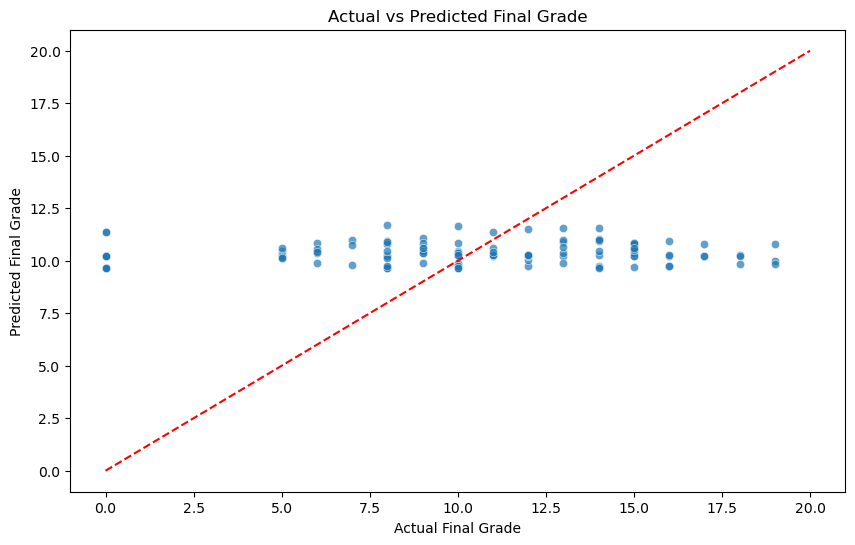

           Coefficient
studytime     0.581548
absences      0.033974


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
file_path = 'student-mat.csv'
data = pd.read_csv(file_path, sep=';')

# Step 2: Select predictor and outcome variables
X = data[['studytime', 'absences']]
y = data['G3']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualizing the relationship between actual and predicted grades
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([0, 20], [0, 20], '--k', color='red')
plt.xlabel("Actual Final Grade")
plt.ylabel("Predicted Final Grade")
plt.title("Actual vs Predicted Final Grade")
plt.show()

# Visualizing the coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)
